<a href="https://colab.research.google.com/github/Amitejashrout99/SuperconductivityPrediction/blob/main/ENPM_808W_Project_Initial_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [260]:
! ls drive/MyDrive/ProjectDataset/
folder_path = "drive/MyDrive/ProjectDataset/"
training_file_path = "drive/MyDrive/ProjectDataset/train.csv"
unique_materials_file_path = "drive/MyDrive/ProjectDataset/unique_m.csv"

train.csv  unique_m.csv


Importing the necessary libraries

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#Importing the library which calculates the VIF for the relevant columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
#Importing the SelectFromModel
from sklearn.feature_selection import SelectFromModel
#Importing Recursive Feature Selection with Cross Validation
from sklearn.feature_selection import RFECV
#Importing the Standard Scalar so that the features can be scaled.
from sklearn.preprocessing import StandardScaler

In [185]:
#Loading the training dataset
atomic_properties_df = pd.read_csv( filepath_or_buffer= training_file_path  )
#Printing the dataframe
print( atomic_properties_df.head() )
#Looks like there are 82 properties

   number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607           

In [186]:
#Printing the dataframe properties
print( atomic_properties_df.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [187]:
#Printing the length of the model before dropping the duplicates
print( f"The length of the dataset before dropping the duplicates is { len(atomic_properties_df) }" )
#Dropping the duplicates
atomic_properties_df = atomic_properties_df.drop_duplicates()
#Printing the length of the model after dropping the duplicates
print( f"The length of the dataset after dropping the duplicates is { len( atomic_properties_df ) }" )

The length of the dataset before dropping the duplicates is 21263
The length of the dataset after dropping the duplicates is 21197


In [188]:
#Reducing the feature columns to the indexes that we are left with after dropping the one with low abs corr scores and creating the feature variables dataset
atomic_properties_df_feature_variables = atomic_properties_df.drop( columns=["critical_temp"] )
#Printing the columns present in the new dataframe after taking the subset
print( atomic_properties_df_feature_variables.columns )
#Creating the Response Variable dataset by selecting the critical temperature from the dataset
atomic_properties_df_response_variable = atomic_properties_df[["critical_temp"]]

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [189]:
#Estimating the RMSE error obtained by training the model on all the features
#Before using the correlation filter, splitting the dataset into test and train dataset and checking the perfromance of the features selected by using the model.
atomic_properties_df_X_train, atomic_properties_df_X_test, atomic_properties_df_y_train, atomic_properties_df_y_test = train_test_split( atomic_properties_df_feature_variables, atomic_properties_df_response_variable, test_size=0.33, random_state=42 )
#Printing the shape of the training and testing dataset so as to ensure that everything is correct
print( f"The shape of the feature variable in the training dataset is {atomic_properties_df_X_train.shape}" )
print( f"The shape of the response variable in the training dataset is {atomic_properties_df_y_train.shape}")
print( f"The shape of the feature variable in the testing dataset is {atomic_properties_df_X_test.shape}" )
print( f"The shape of the response variable in the testing dataset is {atomic_properties_df_y_test.shape}")

The shape of the feature variable in the training dataset is (14201, 81)
The shape of the response variable in the training dataset is (14201, 1)
The shape of the feature variable in the testing dataset is (6996, 81)
The shape of the response variable in the testing dataset is (6996, 1)


In [190]:
#Fitting the model on the Linear Regression and trying to get the RMSE score on the test dataset
linearRegressionModel = LinearRegression()
#Training the model
linearRegressionModel.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
#Getting the predictions
linearModelPredictions = linearRegressionModel.predict( atomic_properties_df_X_test )
#Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions, atomic_properties_df_y_test, squared= False )
#Converting the RMSE values to a dataframe
#mean_squared_error_values_df = pd.DataFrame( mean_squared_error_values, columns=["error_value"] )
#Printing the mean squared error values
print( f"The mean_squared_error_values using this set of features is { mean_squared_error_values }" )

The mean_squared_error_values using this set of features is 17.640477782341474


In [191]:
#Printing the R^2 score of the classifier
r_square_value = metrics.r2_score( linearModelPredictions, atomic_properties_df_y_test )
print( f"The r_square_value of this feature of subset is { r_square_value }" )

The r_square_value of this feature of subset is 0.6406422478369597


[-2.86, 0.92, -0.95, -0.57, 0.68, -32.33, 1.44, 0.2, 0.03, -0.52, 0.08, 0.19, -0.2, -0.19, 0.22, -113.58, 37.27, 0.06, 0.02, -0.19, -0.01, -0.38, 3.0, 0.02, -2.58, 61.35, 46.76, 0.21, -0.1, -0.43, -0.29, -0.01, 0.0, 0.0, 0.0, 20.44, -20.29, -0.0, -0.0, 0.01, -0.0, -0.07, 0.55, 0.17, -0.61, 5.29, -23.2, -0.4, -0.15, 1.32, -0.56, 1.61, -1.87, -1.38, 1.5, -20.36, 25.18, -0.31, 0.62, -0.7, 0.73, -0.08, 0.52, -0.06, -0.32, 12.51, 1.37, -0.09, -0.23, 0.29, -0.01, -15.45, 26.9, 19.8, -31.24, 80.2, -63.09, 4.75, -0.09, 7.1, -25.44]


<Axes: title={'center': 'Bar-graph showing the coefficients values for each column recieved from the linear regression of the columns in the feature dataset'}>

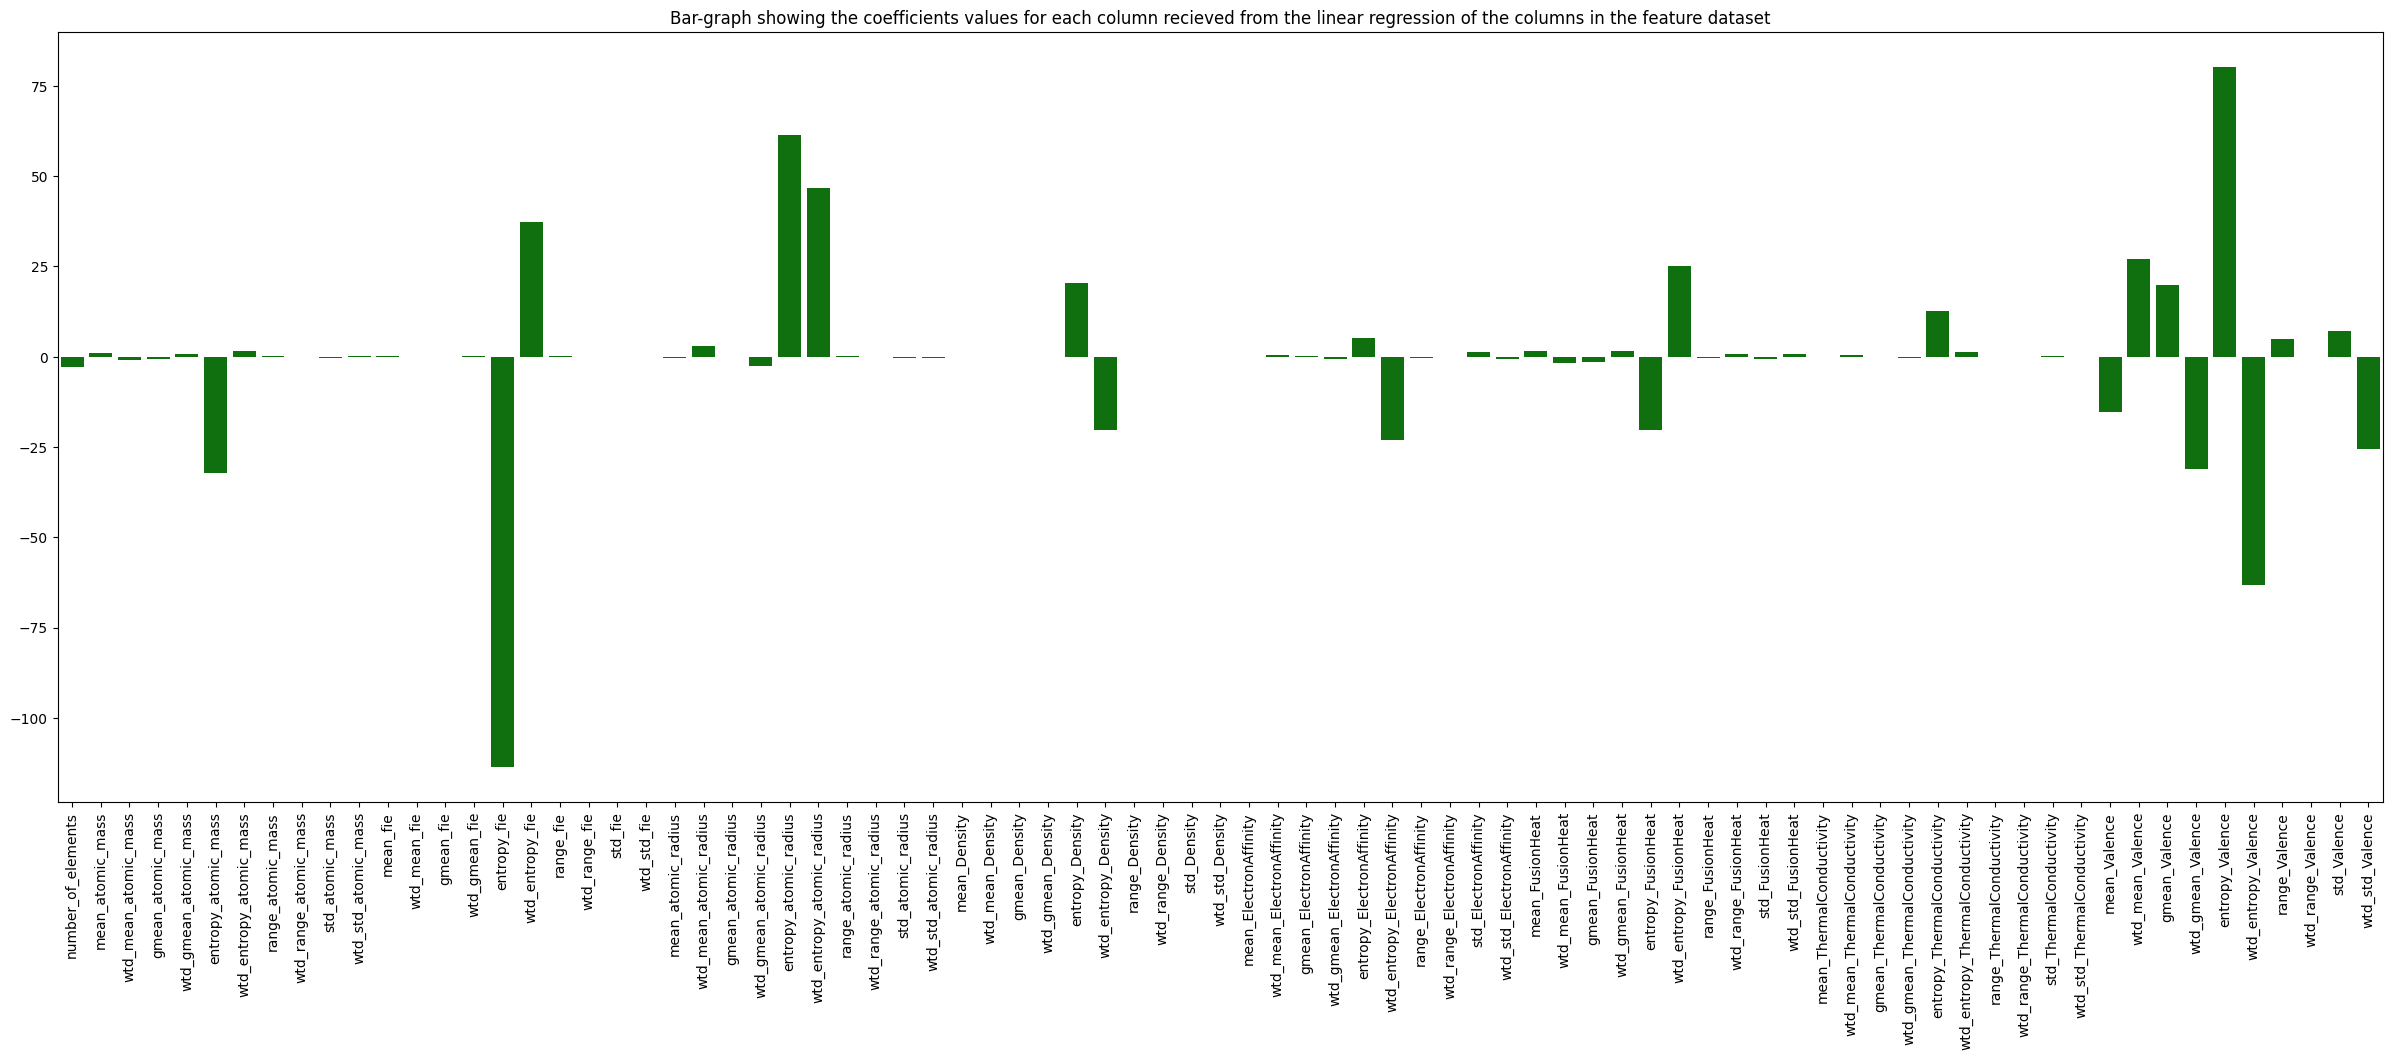

In [192]:
#Extracting the coefficient values of the linear regression model
coefficients_linear_regression = linearRegressionModel.coef_[0]
coefficients_linear_regression = [ float( "{:.2f}".format( x ) ) for x in coefficients_linear_regression ]
#Printing the coefficients of the linear regression model
print( coefficients_linear_regression )
#Plotting the coeffiecients in form of a bar-graph
plt.figure( figsize = ( 30,10 ) )
plt.title( "Bar-graph showing the coefficients values for each column recieved from the linear regression of the columns in the feature dataset" )
plt.xticks( ticks = np.arange( 0, len( coefficients_linear_regression ), step = 1  ), labels = atomic_properties_df_feature_variables.columns.values, rotation='vertical')
#Plotting the bar-plot
sns.barplot( x = atomic_properties_df_feature_variables.columns.values , y = coefficients_linear_regression, color = "green" )

Looking from the coefficient values, we can notice that the columns with the "entropy" feature attached to it plays a very important role in co-relating with the "critical temperature". It can be seen that majority of the features don't play an important role in correlating with the target column. For the next round of feature selection, may-be we can select these features only who have a significant value of co-relation whether it may be negative or positive.

In [193]:
#Getting the indexes of the features who have at least > +2.0 co-relation value and < -2.0 co-realtion value
first_filter_significant_columns = []
for coefficients, column in zip( coefficients_linear_regression, atomic_properties_df_feature_variables.columns.values.tolist() ):
  if( coefficients >= 0.5 or coefficients <= -0.5 ):
    first_filter_significant_columns.append( column )
#Printing the significant_columns length
print( f"The number of significantly co-related columns are { len( first_filter_significant_columns ) }" )
#Printing the significant columns
print( first_filter_significant_columns )

The number of significantly co-related columns are 43
['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'std_atomic_mass', 'entropy_fie', 'wtd_entropy_fie', 'wtd_mean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'entropy_Density', 'wtd_entropy_Density', 'wtd_mean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity', 'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat', 'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat', 'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'wtd_range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat', 'wtd_mean_ThermalConductivity', 'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity', 'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence', 'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence'

In [194]:
#Taking the subset of these features from the model and running the Linear Regression Model
atomic_properties_df_feature_variables = atomic_properties_df_feature_variables[ first_filter_significant_columns ]
#Printing the feature variables dataset
print( atomic_properties_df_feature_variables.head() )

   number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  std_atomic_mass  entropy_fie  wtd_entropy_fie  \
0                 1.062396        51.968828     1.305967         0.791488   
1                 1.057755        47.094633   

In [195]:
#Estimating the RMSE error obtained by training the model on all the features
#Before using the correlation filter, splitting the dataset into test and train dataset and checking the perfromance of the features selected by using the model.
atomic_properties_df_X_train, atomic_properties_df_X_test, atomic_properties_df_y_train, atomic_properties_df_y_test = train_test_split( atomic_properties_df_feature_variables, atomic_properties_df_response_variable, test_size=0.33, random_state=42 )
#Printing the shape of the training and testing dataset so as to ensure that everything is correct
print( f"The shape of the feature variable in the training dataset is {atomic_properties_df_X_train.shape}" )
print( f"The shape of the response variable in the training dataset is {atomic_properties_df_y_train.shape}")
print( f"The shape of the feature variable in the testing dataset is {atomic_properties_df_X_test.shape}" )
print( f"The shape of the response variable in the testing dataset is {atomic_properties_df_y_test.shape}")

The shape of the feature variable in the training dataset is (14201, 43)
The shape of the response variable in the training dataset is (14201, 1)
The shape of the feature variable in the testing dataset is (6996, 43)
The shape of the response variable in the testing dataset is (6996, 1)


In [196]:
#Fitting the model on the Linear Regression and trying to get the RMSE score on the test dataset
linearRegressionModel = LinearRegression()
#Training the model
linearRegressionModel.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
#Getting the predictions
linearModelPredictions = linearRegressionModel.predict( atomic_properties_df_X_test )
#Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions, atomic_properties_df_y_test, squared= False )
#Converting the RMSE values to a dataframe
#mean_squared_error_values_df = pd.DataFrame( mean_squared_error_values, columns=["error_value"] )
#Printing the mean squared error values
print( f"The mean_squared_error_values using this set of features is { mean_squared_error_values }" )

The mean_squared_error_values using this set of features is 19.495094557500536


In [197]:
#Printing the R^2 score of the classifier
r_square_value = metrics.r2_score( linearModelPredictions, atomic_properties_df_y_test )
print( f"The r_square_value of this feature of subset is { r_square_value }" )

The r_square_value of this feature of subset is 0.5214582724865184


In [198]:
#Since our features are not linearly related, let's try polynomial regression
polynomialFeatures = PolynomialFeatures( degree = 2, include_bias=False )
#Fitting the polynomial feaures onto the training features dataset
atomic_properties_df_X_train = polynomialFeatures.fit_transform( atomic_properties_df_X_train )
#Fitting the polynomial features onto the testing features dataset
atomic_properties_df_X_test = polynomialFeatures.fit_transform( atomic_properties_df_X_test )
#Creating a object of the Linear Regression that will train on these properties
linearRegressionModel = LinearRegression()
#Training the model
linearRegressionModel.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
#Getting the predictions output from the model
linearModelPredictions = linearRegressionModel.predict( atomic_properties_df_X_test )
#Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions, atomic_properties_df_y_test, squared= False )
#Converting the RMSE values to a dataframe
#mean_squared_error_values_df = pd.DataFrame( mean_squared_error_values, columns=["error_value"] )
#Printing the mean squared error values
print( f"The mean_squared_error_values using this set of features is { mean_squared_error_values }" )

The mean_squared_error_values using this set of features is 14.688463204079987


In [199]:
#Printing the R^2 score of the classifier
r_square_value = metrics.r2_score( linearModelPredictions, atomic_properties_df_y_test )
print( f"The r_square_value of this feature of subset is { r_square_value }" )

The r_square_value of this feature of subset is 0.7891044054727749


In [200]:
#Using a Decision Tree Regressor to predict so that we can get the best scores
decisionTreeRegressor = DecisionTreeRegressor()
#Training the model
decisionTreeRegressor.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
#Getting the predictions from the decision Tree Regressor
predictions_decision_tree_regressor = decisionTreeRegressor.predict( atomic_properties_df_X_test )
##Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions, atomic_properties_df_y_test, squared= False )
#Converting the RMSE values to a dataframe
#mean_squared_error_values_df = pd.DataFrame( mean_squared_error_values, columns=["error_value"] )
#Printing the mean squared error values
print( f"The mean_squared_error_values using this set of features is { mean_squared_error_values }" )

The mean_squared_error_values using this set of features is 14.688463204079987


In [201]:
#Printing the R^2 score of the classifier
r_square_value = metrics.r2_score( linearModelPredictions, atomic_properties_df_y_test )
print( f"The r_square_value of this feature of subset is { r_square_value }" )

The r_square_value of this feature of subset is 0.7891044054727749


Since from the initial exploratory analysis, it was proved that the features in general don't share Linear Relationship with Critical Temperature, therefore it was prudent to explore the Quadratic Relationship among the features using Polynomial Features

In [202]:
#Adding a constant column so that we can get the actual VIF factor as the VIF factor assumes a constant in the calculation
#atomic_properties_filtered.loc[:,"constant_column"] = 1
#Printing the column values
atomic_properties_df_feature_variables_constant = add_constant( atomic_properties_df_feature_variables )
#Printing the columns in the constant_columns
print( atomic_properties_df_feature_variables_constant.info() )
atomic_properties_multicollinear = pd.Series([variance_inflation_factor(  atomic_properties_df_feature_variables_constant.values, i)
for i in range(  atomic_properties_df_feature_variables_constant.shape[1])],
              index=atomic_properties_df_feature_variables_constant.columns)
#Printing the series
print( atomic_properties_multicollinear )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21197 entries, 0 to 21262
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   const                            21197 non-null  float64
 1   number_of_elements               21197 non-null  int64  
 2   mean_atomic_mass                 21197 non-null  float64
 3   wtd_mean_atomic_mass             21197 non-null  float64
 4   gmean_atomic_mass                21197 non-null  float64
 5   wtd_gmean_atomic_mass            21197 non-null  float64
 6   entropy_atomic_mass              21197 non-null  float64
 7   wtd_entropy_atomic_mass          21197 non-null  float64
 8   std_atomic_mass                  21197 non-null  float64
 9   entropy_fie                      21197 non-null  float64
 10  wtd_entropy_fie                  21197 non-null  float64
 11  wtd_mean_atomic_radius           21197 non-null  float64
 12  wtd_gmean_atomic_r

In [203]:
#Converting the multicollinear properties to a dataframe and plotting the results in form of a bar-graph
atomic_properties_multicollinear_df = atomic_properties_multicollinear.to_frame( name = "variance_factor" )
#Resetting the index so as to create a new dataframe with the updated results
atomic_properties_multicollinear_df = atomic_properties_multicollinear_df.reset_index( level = 0 )
#Changing the column name
atomic_properties_multicollinear_df = atomic_properties_multicollinear_df.rename( columns={ "index":"column_name" } )
#Printing the dataframe after creating the dataframe
print( atomic_properties_multicollinear_df.head() )

            column_name  variance_factor
0                 const       255.676090
1    number_of_elements        31.674728
2      mean_atomic_mass       167.790894
3  wtd_mean_atomic_mass       198.309274
4     gmean_atomic_mass       183.275462


<Axes: title={'center': 'Bar-graph showing the variance_factor of the columns in the feature dataset'}, xlabel='column_name', ylabel='variance_factor'>

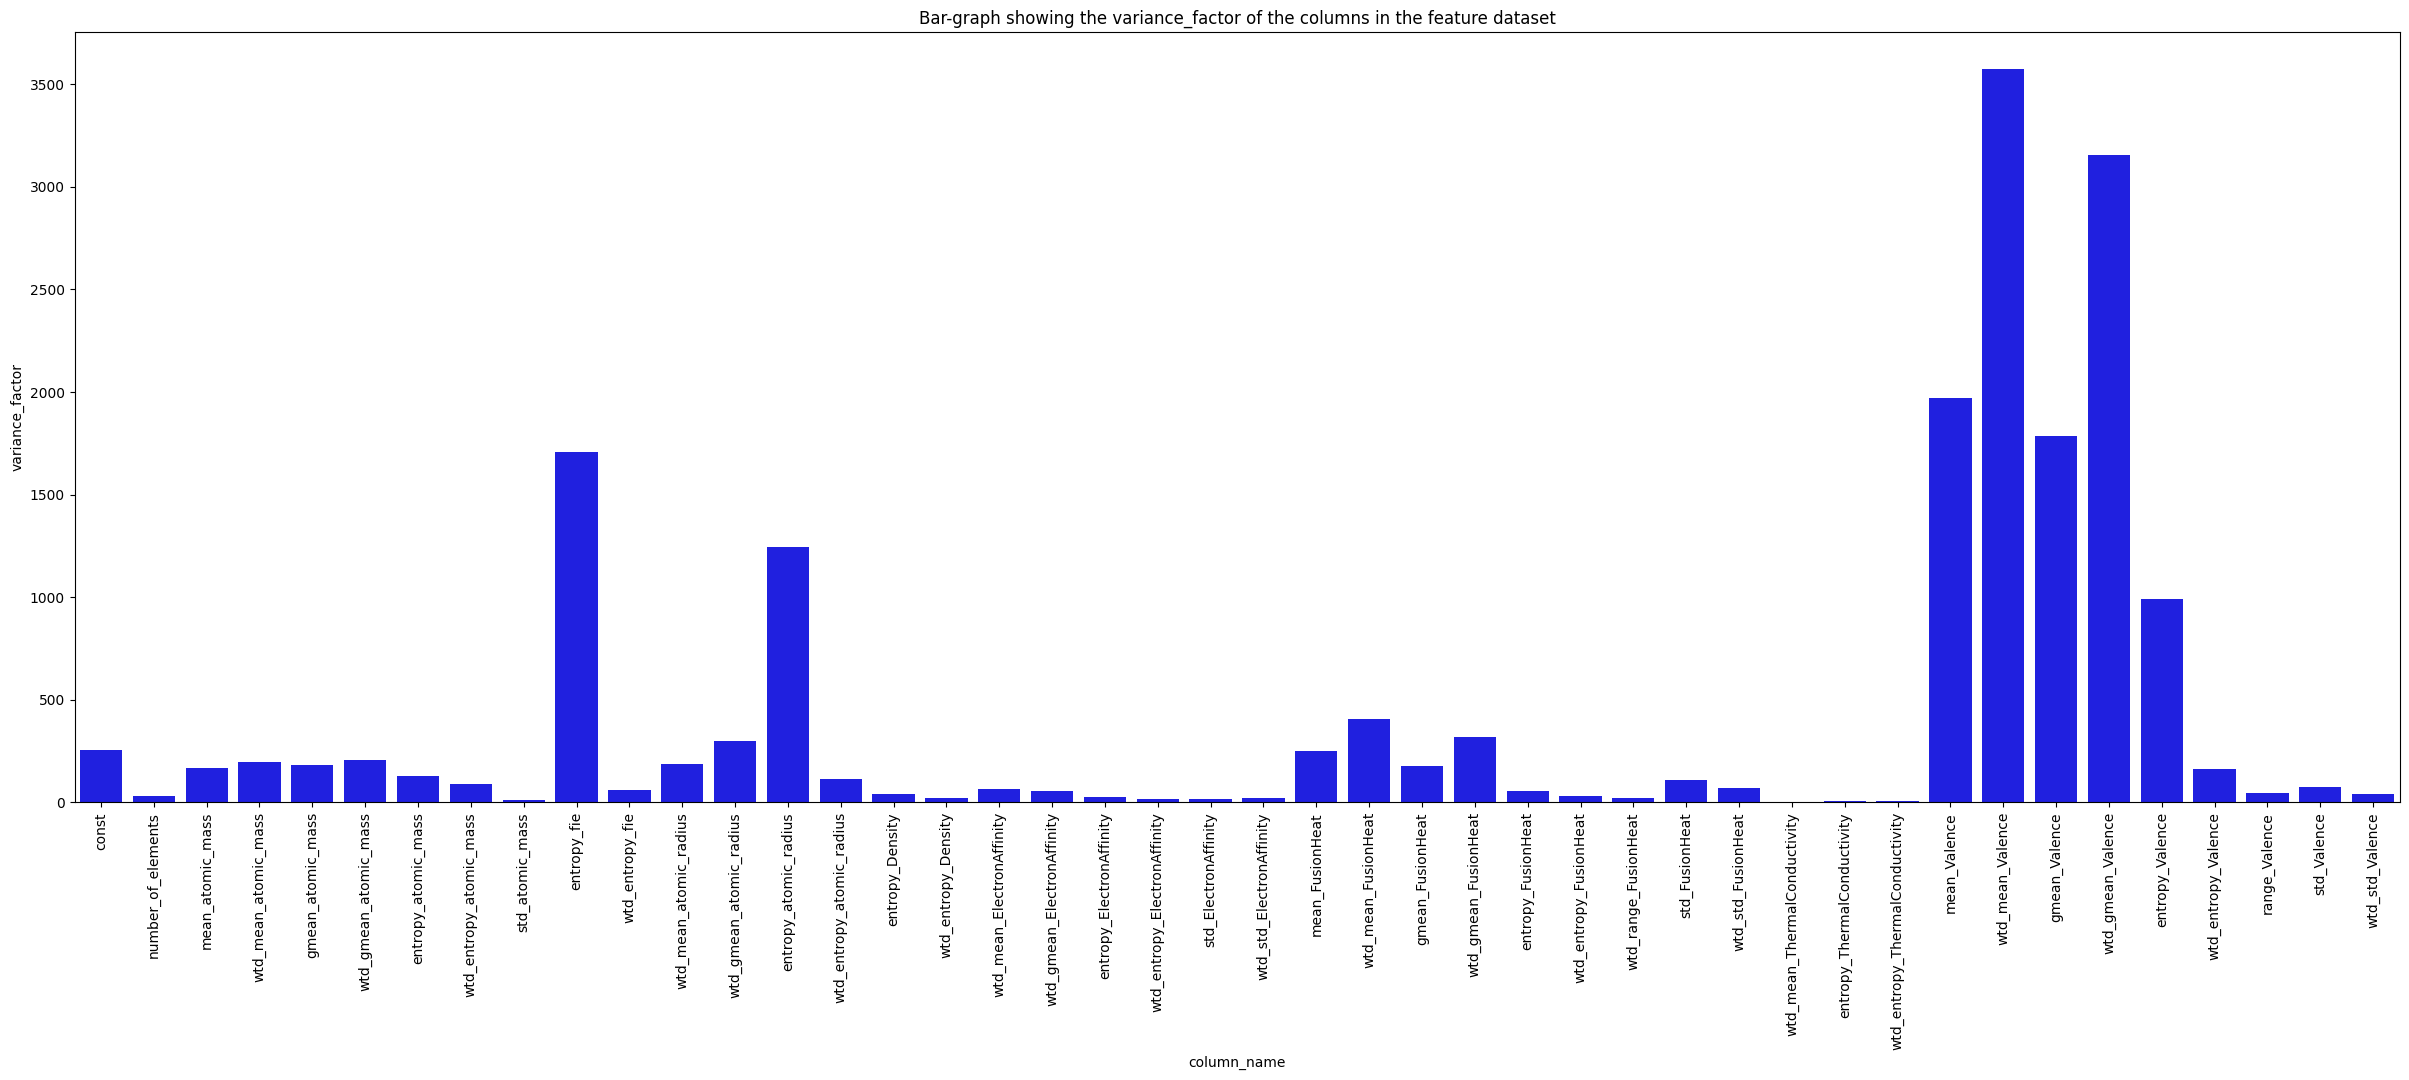

In [204]:
#Plotting the variance factor in form of a bar-graph so that we can identify which column_name should be dropped after the first round of the filtering
plt.figure( figsize = ( 30,10 ) )
plt.title( "Bar-graph showing the variance_factor of the columns in the feature dataset" )
#Limiting the y axis to 100 so that we can get a better idea
#plt.ylim( 0, 2000 )
plt.xticks(np.arange(0,len( atomic_properties_multicollinear_df["column_name"].values ),step=1), atomic_properties_multicollinear_df["column_name"].values , rotation='vertical')
sns.barplot( data = atomic_properties_multicollinear_df , x= "column_name" , y = "variance_factor" , color = 'blue')

In [205]:
#Dropping all the features which have a very high VIF factor above 100 and analyzing the variance_factor
atomic_properties_multicollinear_df = atomic_properties_multicollinear_df[( atomic_properties_multicollinear_df["variance_factor"] < 100 )]
#Getting the list of all the columns in the dataframe
columns_names_atomic_properties_multicollinear_df = atomic_properties_multicollinear_df["column_name"].values.tolist()
#Printing the column names
print( columns_names_atomic_properties_multicollinear_df )
#Getting all the feature columns from the multicollinear df and taking the subset of those column from the features column
atomic_properties_df_feature_variables = atomic_properties_df_feature_variables[ columns_names_atomic_properties_multicollinear_df ]
#Printing the length of the columns after taking the subset
print( f"The length of the subset after dropping the dataset is { len( atomic_properties_df_feature_variables.columns ) }" )
#Printing the columns present in the new dataframe after taking the subset
print( atomic_properties_df_feature_variables.columns )

['number_of_elements', 'wtd_entropy_atomic_mass', 'std_atomic_mass', 'wtd_entropy_fie', 'entropy_Density', 'wtd_entropy_Density', 'wtd_mean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity', 'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'wtd_range_FusionHeat', 'wtd_std_FusionHeat', 'wtd_mean_ThermalConductivity', 'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity', 'range_Valence', 'std_Valence', 'wtd_std_Valence']
The length of the subset after dropping the dataset is 22
Index(['number_of_elements', 'wtd_entropy_atomic_mass', 'std_atomic_mass',
       'wtd_entropy_fie', 'entropy_Density', 'wtd_entropy_Density',
       'wtd_mean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'std_ElectronAffinity', 'wtd_std_ElectronAffinity',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'wtd_ran

In [206]:
#Estimating the RMSE error obtained by training the model on the subset of the features
#Before using the next iteration of the feature selection by reducing the variance factor, splitting the dataset into test and train dataset and checking the perfromance of the features selected by using the model.
atomic_properties_df_X_train, atomic_properties_df_X_test, atomic_properties_df_y_train, atomic_properties_df_y_test = train_test_split( atomic_properties_df_feature_variables, atomic_properties_df_response_variable, test_size=0.33, random_state=42 )
#Printing the shape of the training and testing dataset so as to ensure that everything is correct
print( f"The shape of the feature variable in the training dataset is {atomic_properties_df_X_train.shape}" )
print( f"The shape of the response variable in the training dataset is {atomic_properties_df_y_train.shape}")
print( f"The shape of the feature variable in the testing dataset is {atomic_properties_df_X_test.shape}" )
print( f"The shape of the response variable in the testing dataset is {atomic_properties_df_y_test.shape}")

The shape of the feature variable in the training dataset is (14201, 22)
The shape of the response variable in the training dataset is (14201, 1)
The shape of the feature variable in the testing dataset is (6996, 22)
The shape of the response variable in the testing dataset is (6996, 1)


In [207]:
#Fitting the model on the Linear Regression and trying to get the RMSE score on the test dataset
linearRegressionModel = LinearRegression()
#Training the model
linearRegressionModel.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
#Getting the predictions
linearModelPredictions = linearRegressionModel.predict( atomic_properties_df_X_test )
#Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions, atomic_properties_df_y_test, squared= False )
#Converting the RMSE values to a dataframe
#mean_squared_error_values_df = pd.DataFrame( mean_squared_error_values, columns=["error_value"] )
#Printing the mean squared error values
print( f"The mean_squared_error_values using this set of features is { mean_squared_error_values }" )

The mean_squared_error_values using this set of features is 20.565360744676283


In [208]:
#Printing the R^2 score of the classifier
r_square_value = metrics.r2_score( linearModelPredictions, atomic_properties_df_y_test )
print( f"The r_square_value of this feature of subset is { r_square_value }" )

The r_square_value of this feature of subset is 0.4368670710233792


In [209]:
#Since our features are not linearly related, let's try polynomial regression
polynomialFeatures = PolynomialFeatures( degree = 2, include_bias=False )
#Fitting the polynomial feaures onto the training features dataset
atomic_properties_df_X_train = polynomialFeatures.fit_transform( atomic_properties_df_X_train )
#Fitting the polynomial features onto the testing features dataset
atomic_properties_df_X_test = polynomialFeatures.fit_transform( atomic_properties_df_X_test )
#Creating a object of the Linear Regression that will train on these properties
linearRegressionModel = LinearRegression()
#Training the model
linearRegressionModel.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
#Getting the predictions output from the model
linearModelPredictions = linearRegressionModel.predict( atomic_properties_df_X_test )
#Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions, atomic_properties_df_y_test, squared= False )
#Converting the RMSE values to a dataframe
#mean_squared_error_values_df = pd.DataFrame( mean_squared_error_values, columns=["error_value"] )
#Printing the mean squared error values
print( f"The mean_squared_error_values using this set of features is { mean_squared_error_values }" )

The mean_squared_error_values using this set of features is 15.838382267559483


In [210]:
#Printing the R^2 score of the classifier
r_square_value = metrics.r2_score( linearModelPredictions, atomic_properties_df_y_test )
print( f"The r_square_value of this feature of subset is { r_square_value }" )

The r_square_value of this feature of subset is 0.7333344835549197


In [211]:
#Adding a constant column so that we can get the actual VIF factor as the VIF factor assumes a constant in the calculation
#atomic_properties_filtered.loc[:,"constant_column"] = 1
#Printing the column values
atomic_properties_df_feature_variables_constant = add_constant( atomic_properties_df_feature_variables )
#Printing the columns in the constant_columns
print( atomic_properties_df_feature_variables_constant.info() )
atomic_properties_multicollinear = pd.Series([variance_inflation_factor(  atomic_properties_df_feature_variables_constant.values, i)
for i in range(  atomic_properties_df_feature_variables_constant.shape[1])],
              index=atomic_properties_df_feature_variables_constant.columns)
#Printing the series
print( atomic_properties_multicollinear )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21197 entries, 0 to 21262
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   const                            21197 non-null  float64
 1   number_of_elements               21197 non-null  int64  
 2   wtd_entropy_atomic_mass          21197 non-null  float64
 3   std_atomic_mass                  21197 non-null  float64
 4   wtd_entropy_fie                  21197 non-null  float64
 5   entropy_Density                  21197 non-null  float64
 6   wtd_entropy_Density              21197 non-null  float64
 7   wtd_mean_ElectronAffinity        21197 non-null  float64
 8   wtd_gmean_ElectronAffinity       21197 non-null  float64
 9   entropy_ElectronAffinity         21197 non-null  float64
 10  wtd_entropy_ElectronAffinity     21197 non-null  float64
 11  std_ElectronAffinity             21197 non-null  float64
 12  wtd_std_ElectronAf

In [212]:
#Converting the multicollinear properties to a dataframe and plotting the results in form of a bar-graph
atomic_properties_multicollinear_df = atomic_properties_multicollinear.to_frame( name = "variance_factor" )
#Resetting the index so as to create a new dataframe with the updated results
atomic_properties_multicollinear_df = atomic_properties_multicollinear_df.reset_index( level = 0 )
#Changing the column name
atomic_properties_multicollinear_df = atomic_properties_multicollinear_df.rename( columns={ "index":"column_name" } )
#Printing the dataframe after creating the dataframe
print( atomic_properties_multicollinear_df.head() )

               column_name  variance_factor
0                    const        34.086568
1       number_of_elements        18.875469
2  wtd_entropy_atomic_mass        10.209647
3          std_atomic_mass         1.983575
4          wtd_entropy_fie        13.065609


<Axes: title={'center': 'Bar-graph showing the variance_factor of the columns in the feature dataset'}, xlabel='column_name', ylabel='variance_factor'>

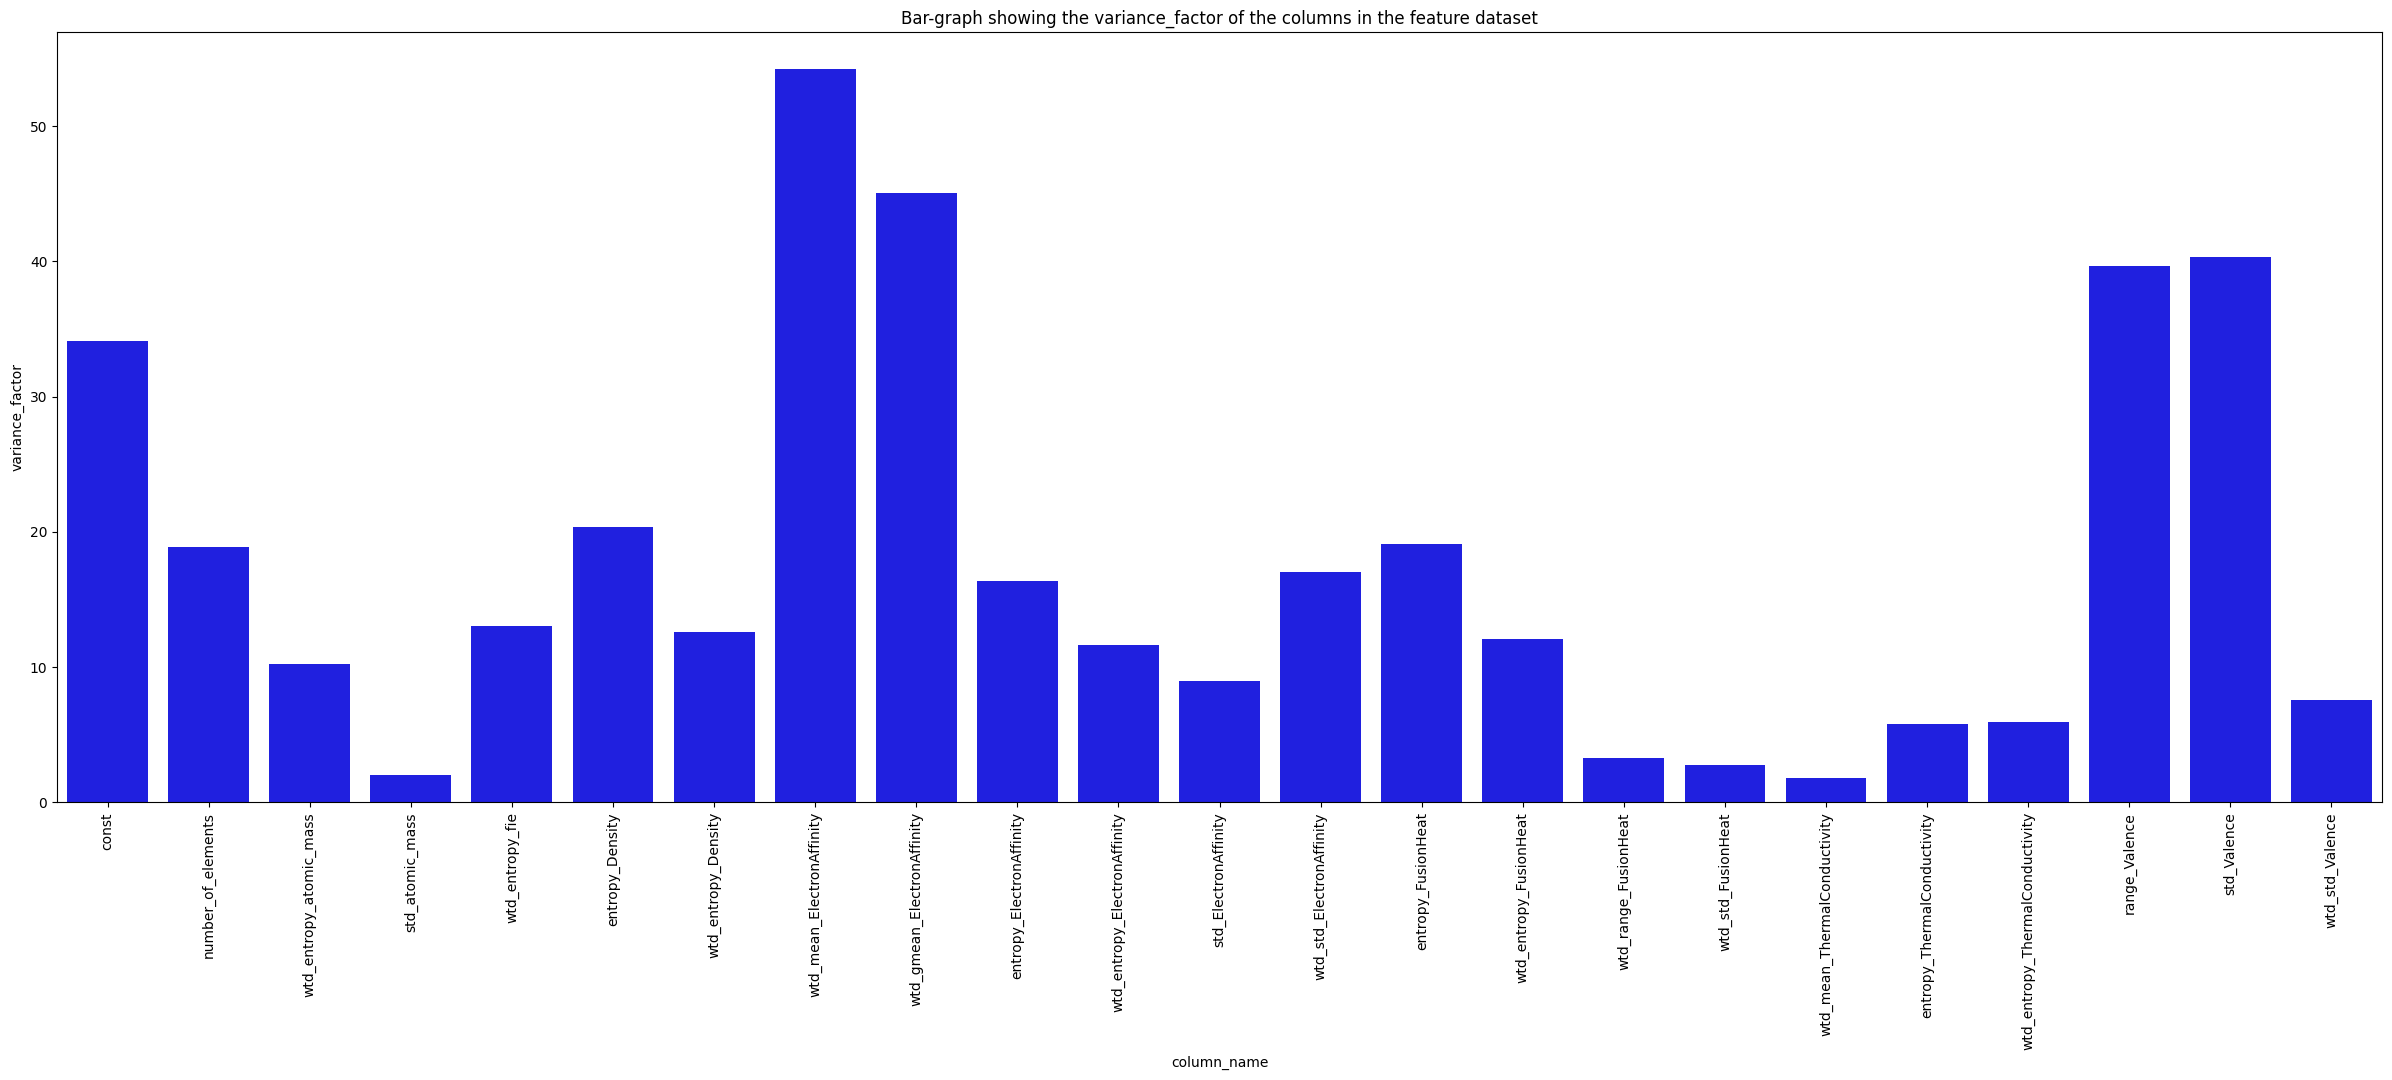

In [213]:
#Plotting the variance factor in form of a bar-graph so that we can identify which column_name should be dropped after the first round of the filtering
plt.figure( figsize = ( 30,10 ) )
plt.title( "Bar-graph showing the variance_factor of the columns in the feature dataset" )
plt.xticks(np.arange(0,len( atomic_properties_multicollinear_df["column_name"].values ),step=1), atomic_properties_multicollinear_df["column_name"].values , rotation='vertical')
sns.barplot( data = atomic_properties_multicollinear_df , x= "column_name" , y = "variance_factor" , color = 'blue')

In [214]:
#Dropping all the features which have a very high VIF factor above 20 and analyzing the variance_factor
atomic_properties_multicollinear_df = atomic_properties_multicollinear_df[( atomic_properties_multicollinear_df["variance_factor"] <= 20 )]
#Getting the list of all the columns in the dataframe
columns_names_atomic_properties_multicollinear_df = atomic_properties_multicollinear_df["column_name"].values.tolist()
#Printing the column names
print( columns_names_atomic_properties_multicollinear_df )
#Getting all the feature columns from the multicollinear df and taking the subset of those column from the features column
atomic_properties_df_feature_variables = atomic_properties_df_feature_variables[ columns_names_atomic_properties_multicollinear_df ]
#Printing the length of the columns after taking the subset
print( f"The length of the subset after dropping the dataset is { len( atomic_properties_df_feature_variables.columns ) }" )
#Printing the columns present in the new dataframe after taking the subset
print( atomic_properties_df_feature_variables.columns )

['number_of_elements', 'wtd_entropy_atomic_mass', 'std_atomic_mass', 'wtd_entropy_fie', 'wtd_entropy_Density', 'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity', 'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'wtd_range_FusionHeat', 'wtd_std_FusionHeat', 'wtd_mean_ThermalConductivity', 'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity', 'wtd_std_Valence']
The length of the subset after dropping the dataset is 17
Index(['number_of_elements', 'wtd_entropy_atomic_mass', 'std_atomic_mass',
       'wtd_entropy_fie', 'wtd_entropy_Density', 'entropy_ElectronAffinity',
       'wtd_entropy_ElectronAffinity', 'std_ElectronAffinity',
       'wtd_std_ElectronAffinity', 'entropy_FusionHeat',
       'wtd_entropy_FusionHeat', 'wtd_range_FusionHeat', 'wtd_std_FusionHeat',
       'wtd_mean_ThermalConductivity', 'entropy_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'wtd_std_Valence'],
      dtype='object')


In [215]:
#Estimating the RMSE error obtained by training the model on the subset of the features
#Before using the next iteration of the feature selection by reducing the variance factor, splitting the dataset into test and train dataset and checking the perfromance of the features selected by using the model.
atomic_properties_df_X_train, atomic_properties_df_X_test, atomic_properties_df_y_train, atomic_properties_df_y_test = train_test_split( atomic_properties_df_feature_variables, atomic_properties_df_response_variable, test_size=0.33, random_state=42 )
#Printing the shape of the training and testing dataset so as to ensure that everything is correct
print( f"The shape of the feature variable in the training dataset is {atomic_properties_df_X_train.shape}" )
print( f"The shape of the response variable in the training dataset is {atomic_properties_df_y_train.shape}")
print( f"The shape of the feature variable in the testing dataset is {atomic_properties_df_X_test.shape}" )
print( f"The shape of the response variable in the testing dataset is {atomic_properties_df_y_test.shape}")

The shape of the feature variable in the training dataset is (14201, 17)
The shape of the response variable in the training dataset is (14201, 1)
The shape of the feature variable in the testing dataset is (6996, 17)
The shape of the response variable in the testing dataset is (6996, 1)


In [216]:
#Since our features are not linearly related, let's try polynomial regression
polynomialFeatures = PolynomialFeatures( degree = 2, include_bias=False )
#Fitting the polynomial feaures onto the training features dataset
atomic_properties_df_X_train = polynomialFeatures.fit_transform( atomic_properties_df_X_train )
#Fitting the polynomial features onto the testing features dataset
atomic_properties_df_X_test = polynomialFeatures.fit_transform( atomic_properties_df_X_test )
#Creating a object of the Linear Regression that will train on these properties
linearRegressionModel = LinearRegression()
#Training the model
linearRegressionModel.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
#Getting the predictions output from the model
linearModelPredictions = linearRegressionModel.predict( atomic_properties_df_X_test )
#Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions, atomic_properties_df_y_test, squared= False )
#Converting the RMSE values to a dataframe
#mean_squared_error_values_df = pd.DataFrame( mean_squared_error_values, columns=["error_value"] )
#Printing the mean squared error values
print( f"The mean_squared_error_values using this set of features is { mean_squared_error_values }" )

The mean_squared_error_values using this set of features is 16.529717695970476


In [217]:
#Printing the R^2 score of the classifier
r_square_value = metrics.r2_score( linearModelPredictions, atomic_properties_df_y_test )
print( f"The r_square_value of this feature of subset is { r_square_value }" )

The r_square_value of this feature of subset is 0.7009445406941011


In [218]:
#Adding a constant column so that we can get the actual VIF factor as the VIF factor assumes a constant in the calculation
#atomic_properties_filtered.loc[:,"constant_column"] = 1
#Printing the column values
atomic_properties_df_feature_variables_constant = add_constant( atomic_properties_df_feature_variables )
#Printing the columns in the constant_columns
print( atomic_properties_df_feature_variables_constant.info() )
atomic_properties_multicollinear = pd.Series([variance_inflation_factor(  atomic_properties_df_feature_variables_constant.values, i)
for i in range(  atomic_properties_df_feature_variables_constant.shape[1])],
              index=atomic_properties_df_feature_variables_constant.columns)
#Printing the series
print( atomic_properties_multicollinear )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21197 entries, 0 to 21262
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   const                            21197 non-null  float64
 1   number_of_elements               21197 non-null  int64  
 2   wtd_entropy_atomic_mass          21197 non-null  float64
 3   std_atomic_mass                  21197 non-null  float64
 4   wtd_entropy_fie                  21197 non-null  float64
 5   wtd_entropy_Density              21197 non-null  float64
 6   entropy_ElectronAffinity         21197 non-null  float64
 7   wtd_entropy_ElectronAffinity     21197 non-null  float64
 8   std_ElectronAffinity             21197 non-null  float64
 9   wtd_std_ElectronAffinity         21197 non-null  float64
 10  entropy_FusionHeat               21197 non-null  float64
 11  wtd_entropy_FusionHeat           21197 non-null  float64
 12  wtd_range_FusionHe

In [219]:
#Using a Decision Tree Regressor to predict so that we can get the best scores
decisionTreeRegressor = DecisionTreeRegressor()
#Training the model
decisionTreeRegressor.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
#Getting the predictions from the decision Tree Regressor
predictions_decision_tree_regressor = decisionTreeRegressor.predict( atomic_properties_df_X_test )
##Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions, atomic_properties_df_y_test, squared= False )
#Converting the RMSE values to a dataframe
#mean_squared_error_values_df = pd.DataFrame( mean_squared_error_values, columns=["error_value"] )
#Printing the mean squared error values
print( f"The mean_squared_error_values using this set of features is { mean_squared_error_values }" )


The mean_squared_error_values using this set of features is 16.529717695970476


In [220]:
#Printing the R^2 score of the classifier
r_square_value = metrics.r2_score( linearModelPredictions, atomic_properties_df_y_test )
print( f"The r_square_value of this feature of subset is { r_square_value }" )

The r_square_value of this feature of subset is 0.7009445406941011


## Using the Scikit-Learn feature selection methodologies to select the best feature

### Using the SelectFromModel feature of the Scikit Learn using normal features and all of the features

In [221]:
#Using Linear Regression Model as the model here since we are treating the Linear Classifier as the base model
#Reducing the feature columns to the indexes that we are left with after dropping the one with low abs corr scores and creating the feature variables dataset
atomic_properties_df_feature_variables = atomic_properties_df.drop( columns=["critical_temp"] )
#Printing the columns present in the new dataframe after taking the subset
print( atomic_properties_df_feature_variables.columns )
#Creating the Response Variable dataset by selecting the critical temperature from the dataset
atomic_properties_df_response_variable = atomic_properties_df[["critical_temp"]]

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [222]:
#Estimating the RMSE error obtained by training the model on the subset of the features
#Before using the next iteration of the feature selection by reducing the variance factor, splitting the dataset into test and train dataset and checking the perfromance of the features selected by using the model.
atomic_properties_df_X_train, atomic_properties_df_X_test, atomic_properties_df_y_train, atomic_properties_df_y_test = train_test_split( atomic_properties_df_feature_variables, atomic_properties_df_response_variable, test_size=0.33, random_state=42 )
#Printing the shape of the training and testing dataset so as to ensure that everything is correct
print( f"The shape of the feature variable in the training dataset is {atomic_properties_df_X_train.shape}" )
print( f"The shape of the response variable in the training dataset is {atomic_properties_df_y_train.shape}")
print( f"The shape of the feature variable in the testing dataset is {atomic_properties_df_X_test.shape}" )
print( f"The shape of the response variable in the testing dataset is {atomic_properties_df_y_test.shape}")

The shape of the feature variable in the training dataset is (14201, 81)
The shape of the response variable in the training dataset is (14201, 1)
The shape of the feature variable in the testing dataset is (6996, 81)
The shape of the response variable in the testing dataset is (6996, 1)


In [223]:
#Creating a model of Linear Regression type and then passing the features to the model and training the model
linearRegressionModel = LinearRegression()
#Fitting the model with the training dataset feature variables and response variable
linearRegressionModel.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
#Getting the model by using the SelectFromModel
model_with_selected_features = SelectFromModel( linearRegressionModel, prefit= True )
#New Feature Training dataset
atomic_properties_df_X_train = model_with_selected_features.fit_transform( atomic_properties_df_X_train )
#Printing the new features training dataset
print( atomic_properties_df_X_train.shape )

(14201, 18)


In [224]:
#Getting the features name out from the created model.
features_name = model_with_selected_features.get_feature_names_out()
print( features_name )

['entropy_atomic_mass' 'entropy_fie' 'wtd_entropy_fie'
 'entropy_atomic_radius' 'wtd_entropy_atomic_radius' 'entropy_Density'
 'wtd_entropy_Density' 'wtd_entropy_ElectronAffinity' 'entropy_FusionHeat'
 'wtd_entropy_FusionHeat' 'entropy_ThermalConductivity' 'mean_Valence'
 'wtd_mean_Valence' 'gmean_Valence' 'wtd_gmean_Valence' 'entropy_Valence'
 'wtd_entropy_Valence' 'wtd_std_Valence']


In [225]:
#Getting the particular training features from the model and training Linear Regression model on those features
atomic_properties_df_feature_variables = atomic_properties_df_feature_variables[ features_name ]
#Printing the dataframe
print( atomic_properties_df_feature_variables.head() )

   entropy_atomic_mass  entropy_fie  wtd_entropy_fie  entropy_atomic_radius  \
0             1.181795     1.305967         0.791488               1.259244   
1             1.449309     1.544145         0.807078               1.508328   
2             1.181795     1.305967         0.773620               1.259244   
3             1.181795     1.305967         0.783207               1.259244   
4             1.181795     1.305967         0.805230               1.259244   

   wtd_entropy_atomic_radius  entropy_Density  wtd_entropy_Density  \
0                   1.207040         1.033129             0.814598   
1                   1.204115         1.314442             0.914802   
2                   1.132547         1.033129             0.760305   
3                   1.173033         1.033129             0.788889   
4                   1.261194         1.033129             0.859811   

   wtd_entropy_ElectronAffinity  entropy_FusionHeat  wtd_entropy_FusionHeat  \
0                      0.

In [226]:
#Estimating the RMSE error obtained by training the model on the subset of the features
#Before using the next iteration of the feature selection by reducing the variance factor, splitting the dataset into test and train dataset and checking the perfromance of the features selected by using the model.
atomic_properties_df_X_train, atomic_properties_df_X_test, atomic_properties_df_y_train, atomic_properties_df_y_test = train_test_split( atomic_properties_df_feature_variables, atomic_properties_df_response_variable, test_size=0.33, random_state=42 )
#Printing the shape of the training and testing dataset so as to ensure that everything is correct
print( f"The shape of the feature variable in the training dataset is {atomic_properties_df_X_train.shape}" )
print( f"The shape of the response variable in the training dataset is {atomic_properties_df_y_train.shape}")
print( f"The shape of the feature variable in the testing dataset is {atomic_properties_df_X_test.shape}" )
print( f"The shape of the response variable in the testing dataset is {atomic_properties_df_y_test.shape}")

The shape of the feature variable in the training dataset is (14201, 18)
The shape of the response variable in the training dataset is (14201, 1)
The shape of the feature variable in the testing dataset is (6996, 18)
The shape of the response variable in the testing dataset is (6996, 1)


In [227]:
#Fitting the model on the Linear Regression and trying to get the RMSE score on the test dataset
linearRegressionModel = LinearRegression()
#Training the model
linearRegressionModel.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
#Getting the predictions
linearModelPredictions = linearRegressionModel.predict( atomic_properties_df_X_test )
#Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions, atomic_properties_df_y_test, squared= False )
#Converting the RMSE values to a dataframe
#mean_squared_error_values_df = pd.DataFrame( mean_squared_error_values, columns=["error_value"] )
#Printing the mean squared error values
print( f"The mean_squared_error_values using this set of features is { mean_squared_error_values }" )

The mean_squared_error_values using this set of features is 21.7726504086042


In [228]:
#Since our features are not linearly related, let's try polynomial regression
polynomialFeatures = PolynomialFeatures( degree = 2, include_bias=False )
#Fitting the polynomial feaures onto the training features dataset
atomic_properties_df_X_train = polynomialFeatures.fit_transform( atomic_properties_df_X_train )
#Fitting the polynomial features onto the testing features dataset
atomic_properties_df_X_test = polynomialFeatures.fit_transform( atomic_properties_df_X_test )
#Creating a object of the Linear Regression that will train on these properties
linearRegressionModel = LinearRegression()
#Training the model
linearRegressionModel.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
#Getting the predictions output from the model
linearModelPredictions = linearRegressionModel.predict( atomic_properties_df_X_test )
#Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions, atomic_properties_df_y_test, squared= False )
#Converting the RMSE values to a dataframe
#mean_squared_error_values_df = pd.DataFrame( mean_squared_error_values, columns=["error_value"] )
#Printing the mean squared error values
print( f"The mean_squared_error_values using this set of features is { mean_squared_error_values }" )

The mean_squared_error_values using this set of features is 16.876319911169997


### Using Recursive Feature Selection with Cross-Validation to see which are the best features.

In [229]:
#Creating a cross-validation estimator
cross_validation_estimator = LinearRegression()
#Fitting the estimator with the training data
cross_validation_estimator.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
#Creating the feature selector
feature_selector_cross_validation = RFECV( cross_validation_estimator, cv= 5, step=1, scoring='r2')
#Fitting the training data
feature_selector_cross_validationr = feature_selector_cross_validation.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )

In [231]:
feature_selector_cross_validation_support = feature_selector_cross_validationr.get_support()
atomic_properties_features = []
for bool, feature in zip( feature_selector_cross_validation_support , atomic_properties_df_feature_variables.columns):
  if bool:
    atomic_properties_features.append(feature)
print(f"Best features are:{ atomic_properties_features }")

Best features are:['entropy_atomic_mass', 'entropy_fie', 'wtd_entropy_fie', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'entropy_Density', 'wtd_entropy_Density', 'wtd_entropy_ElectronAffinity', 'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'entropy_ThermalConductivity', 'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence', 'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence', 'wtd_std_Valence']


In [232]:
print( len( atomic_properties_features ) )

18


### Using the unique materials as the file for feature selection and seeing if the presence of the number of elements by itself could be a better choice for the prediction of the crictical temp then using the chemical properties of the elements.

In [233]:
#Loading the unique materials dataset onto a pandas dataframe and analysing it.
unique_materials_data_frame = pd.read_csv( filepath_or_buffer = unique_materials_file_path )
#Printing the dataframe
print( unique_materials_data_frame.head() )
#Printing the dataframe properties as well
print( unique_materials_data_frame.info() )

     H  He   Li   Be    B    C    N    O    F  Ne  ...   Au   Hg   Tl   Pb  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
2  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
3  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
4  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   

    Bi  Po  At  Rn  critical_temp                material  
0  0.0   0   0   0           29.0         Ba0.2La1.8Cu1O4  
1  0.0   0   0   0           26.0  Ba0.1La1.9Ag0.1Cu0.9O4  
2  0.0   0   0   0           19.0         Ba0.1La1.9Cu1O4  
3  0.0   0   0   0           22.0       Ba0.15La1.85Cu1O4  
4  0.0   0   0   0           23.0         Ba0.3La1.7Cu1O4  

[5 rows x 88 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 88 columns):
 #   Column         Non-Null Count  Dty

It can be observed that there are total of **86** elements in the unique_materials dataset that are generally used in the formation of the semiconductors. While we are not chemists, the last number of unique elements that were present in the **periodic_tables** were 118. It can be argued that by taking only **86** features/elements, we are leaving the model to be suspectible of not able to generalize to the presence of **new_element** while creating a semi-conductor but it should also be understood that forming a new semiconductor using a completely new element from those that already have been used takes significant effort and wouldn't likely change.

In [234]:
#Separating the dataset into feature variables and the response variable
#Creating the features dataframe
unique_materials_features_dataset = unique_materials_data_frame.drop( columns = ["critical_temp","material"] )
#Getting the response variable dataframe
unique_materials_response_dataset = unique_materials_data_frame[["critical_temp"]]
#Printing the features dataset
print( unique_materials_features_dataset.head() )
#Printing the response dataset
print( unique_materials_response_dataset.head() )

     H  He   Li   Be    B    C    N    O    F  Ne  ...   Ir   Pt   Au   Hg  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
2  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
3  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
4  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   

    Tl   Pb   Bi  Po  At  Rn  
0  0.0  0.0  0.0   0   0   0  
1  0.0  0.0  0.0   0   0   0  
2  0.0  0.0  0.0   0   0   0  
3  0.0  0.0  0.0   0   0   0  
4  0.0  0.0  0.0   0   0   0  

[5 rows x 86 columns]
   critical_temp
0           29.0
1           26.0
2           19.0
3           22.0
4           23.0


In [235]:
#Splitting the dataset into training and testing dataset and running the linear regression model. By this method we will also be able to get the co-efficients of the elements
#and identify how each element behave with the critical_temp.
unique_materials_df_X_train, unique_materials_df_X_test, unique_materials_df_y_train, unique_materials_df_y_test = train_test_split( unique_materials_features_dataset, unique_materials_response_dataset, test_size=0.33, random_state=42 )
#Printing the shape of the training and testing dataset so as to ensure that everything is correct
print( f"The shape of the feature variable in the training dataset is {unique_materials_df_X_train.shape}" )
print( f"The shape of the response variable in the training dataset is {unique_materials_df_y_train.shape}")
print( f"The shape of the feature variable in the testing dataset is {unique_materials_df_X_test.shape}" )
print( f"The shape of the response variable in the testing dataset is {unique_materials_df_y_test.shape}")


The shape of the feature variable in the training dataset is (14246, 86)
The shape of the response variable in the training dataset is (14246, 1)
The shape of the feature variable in the testing dataset is (7017, 86)
The shape of the response variable in the testing dataset is (7017, 1)


In [236]:
#Creating a scaler object of standard scaler
standardScaler = StandardScaler()
#Scaling the features training dataset and testing dataset
#Scaling the features training dataset
unique_materials_df_X_train_scaled =  standardScaler.fit_transform( unique_materials_df_X_train )
#Scaling the features test dataset
unique_materials_df_X_test_scaled = standardScaler.fit_transform( unique_materials_df_X_test )

In [237]:
#creating a object of linear Regression
linearRegressionModel_uniqueMaterials = LinearRegression()
#Training the model
linearRegressionModel_uniqueMaterials.fit( unique_materials_df_X_train_scaled, unique_materials_df_y_train )
#Predicting the model outcome
linearModelPredictions_uniqueMaterials = linearRegressionModel_uniqueMaterials.predict( unique_materials_df_X_test_scaled )
#Getting the RMSE score of the model
#Getting the RMSE scores
mean_squared_error_value_unique_materials = metrics.mean_squared_error( linearModelPredictions_uniqueMaterials, unique_materials_df_y_test, squared= False )
#Printing the mean squared error values
print( f" The mean squared error value is { mean_squared_error_value_unique_materials }" )

 The mean squared error value is 20.22889749883629


In [238]:
#Printing the R^2 score of the classifier
r_square_value_unique_materials = metrics.r2_score( linearModelPredictions_uniqueMaterials, unique_materials_df_y_test )
print( f"The r_square_value using all the features is { r_square_value_unique_materials }" )


The r_square_value using all the features is 0.4326135547237592


[-0.14, -17930930350778.44, -0.08, -0.34, -0.88, -0.82, -0.11, 0.86, 0.85, -110198816615.01, 0.26, 1.47, -1.38, -7.47, -0.18, -1.54, -0.2, -2796220766.48, 0.02, 7.33, 0.44, -0.43, 1.06, -0.0, -0.06, 0.46, -0.65, -0.81, 1.89, -0.28, -1.19, -3.06, -3.8, -0.82, -0.16, -356.16, 0.76, 8.3, 2.26, -0.36, 1.32, -0.02, -0.19, -0.53, -0.84, -0.45, -0.6, -0.16, -0.66, -0.93, -0.2, -0.51, -0.36, 0.0, 0.3, 19.5, -0.43, -1.23, -0.1, 0.45, 0.0, 0.59, -0.02, 0.64, 0.27, 0.7, 0.61, 0.56, 0.42, 1.27, 1.27, -0.35, 0.35, -0.55, -0.17, -0.73, -1.25, -0.58, -0.36, 2.9, 2.23, 0.5, 2.69, 0.0, 0.0, 0.0]


<Axes: title={'center': 'Bar-graph showing the coefficients values for each column recieved from the linear regression of unqiue-materials by using the columns in the feature dataset'}>

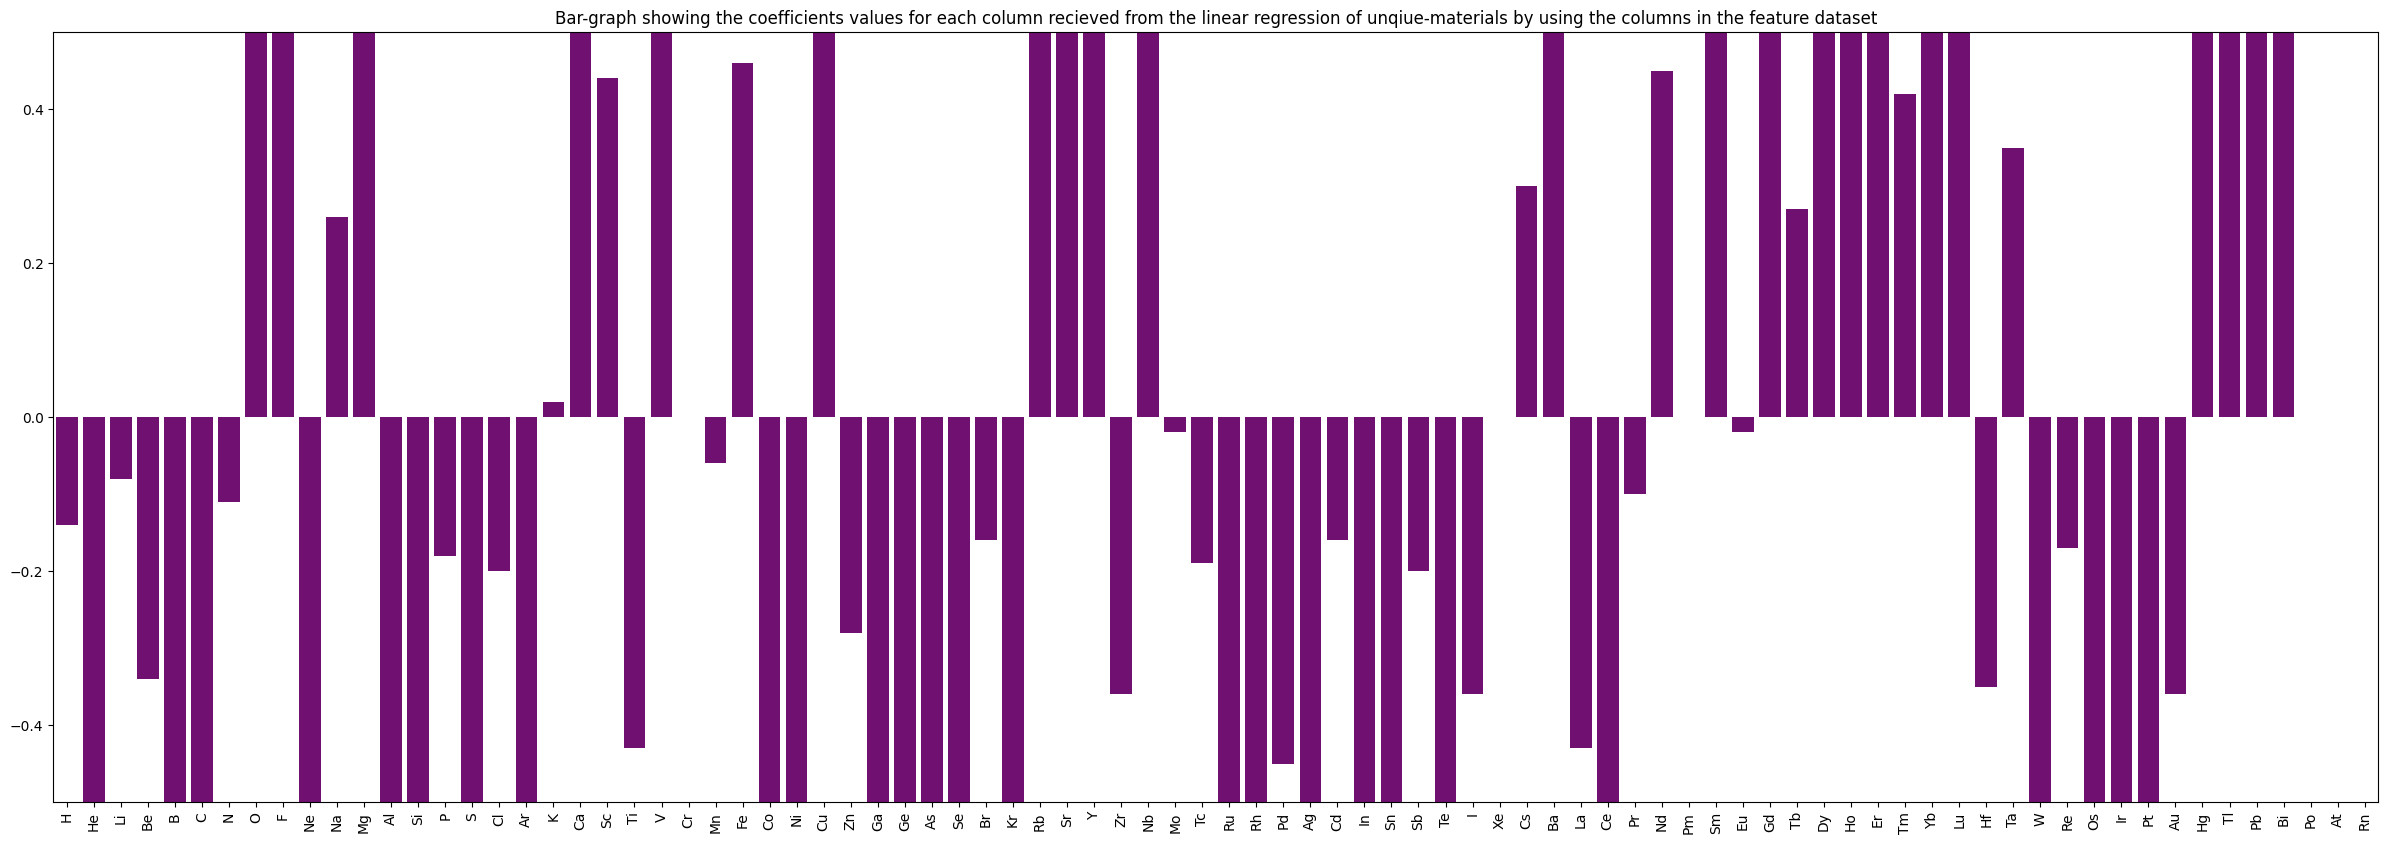

In [239]:
#Extracting the coefficient values of the linear regression model trained using the unique materials
coefficients_linear_regression_for_unique_materials = linearRegressionModel_uniqueMaterials.coef_[0]
coefficients_linear_regression_for_unique_materials = [ float( "{:.2f}".format( x ) ) for x in coefficients_linear_regression_for_unique_materials ]
#Printing the coefficients of the linear regression model for the unique materials
print( coefficients_linear_regression_for_unique_materials )
#Plotting the coeffiecients in form of a bar-graph
plt.figure( figsize = ( 30,10 ) )
plt.title( "Bar-graph showing the coefficients values for each column recieved from the linear regression of unqiue-materials by using the columns in the feature dataset" )
plt.ylim( -0.5,0.5 )
plt.xticks( ticks = np.arange( 0, len( coefficients_linear_regression_for_unique_materials ), step = 1  ), labels = unique_materials_features_dataset.columns.values, rotation='vertical')
#Plotting the bar-plot
sns.barplot( x = unique_materials_features_dataset.columns.values , y = coefficients_linear_regression_for_unique_materials, color = "purple" )

In [240]:
#Trying polynomial regression to see if the features could be improved
polynomialFeatures_uniqueMaterials = PolynomialFeatures( degree = 2, include_bias=False )
#Fitting the polynomial feaures onto the training features dataset
unique_materials_df_X_train_scaled = polynomialFeatures.fit_transform( unique_materials_df_X_train_scaled )
#Fitting the polynomial features onto the testing features dataset
unique_materials_df_X_test_scaled = polynomialFeatures.fit_transform( unique_materials_df_X_test_scaled )
#Creating a object of the Linear Regression that will train on these properties
linearRegressionModel_uniqueMaterials = LinearRegression()
#Training the model
linearRegressionModel_uniqueMaterials.fit( unique_materials_df_X_train_scaled, unique_materials_df_y_train )
#Getting the predictions output from the model
linearModelPredictions_uniqueMaterials = linearRegressionModel_uniqueMaterials.predict( unique_materials_df_X_test_scaled )
#Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions_uniqueMaterials, unique_materials_df_y_test, squared= False )
print( f"The mean_squared_error_values using all the features is { mean_squared_error_values }" )

The mean_squared_error_values using all the features is 4615567324778.219


Since, the correlation values for few columns were coming up as extremely high, on observing the dataset, the dataset was observed for any anomaly of a behaviour. It was observed that most of the properties have a value of 0 which was might have caused the Linear Regression Model to not get trained model properly and the co-efficients value receiving a very high number. Furthermore, this could have been acheived by "Variance-Filter" feature selection criteria but since we decided to first go with the "correlation", this aspect of the materials was missed

In [241]:
#Extracting the variance of the unique materials dataframe
variance_of_features_of_unique_materials_dataframe = unique_materials_features_dataset.var()
#Printing the variances
print( variance_of_features_of_unique_materials_dataframe.head() )
#Creating a list where we can store the elements with zero variance
elements_with_zero_variance = []
#Getting the elements names with zero variance
for index in variance_of_features_of_unique_materials_dataframe.index:
  if( variance_of_features_of_unique_materials_dataframe[ index ] == 0.00 ):
    elements_with_zero_variance.append( index )
#Printing the elements with zero variance
print( "The elements list with zero variance is" )
print( elements_with_zero_variance )

H     0.071406
He    0.000000
Li    0.016784
Be    0.720022
B     1.090951
dtype: float64
The elements list with zero variance is
['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Pm', 'Po', 'At', 'Rn']


In [242]:
#Getting the indexes of the features who have at least > +0.5 co-relation value and < -0.5 co-realtion value
first_filter_significant_columns_for_unique_materials = []
for coefficients, column in zip( coefficients_linear_regression_for_unique_materials, unique_materials_features_dataset.columns.values.tolist() ):
  if( ( not column in elements_with_zero_variance ) and (coefficients >= 0.5 or coefficients <= -0.5) ):
    first_filter_significant_columns_for_unique_materials.append( column )
#Printing the significant_columns length
print( f"The number of significantly co-related columns for unique materials are { len( first_filter_significant_columns_for_unique_materials ) }" )
#Printing the significant columns
print( first_filter_significant_columns_for_unique_materials )

The number of significantly co-related columns for unique materials are 44
['B', 'C', 'O', 'F', 'Mg', 'Al', 'Si', 'S', 'Ca', 'V', 'Co', 'Ni', 'Cu', 'Ga', 'Ge', 'As', 'Se', 'Rb', 'Sr', 'Y', 'Nb', 'Ru', 'Rh', 'Ag', 'In', 'Sn', 'Te', 'Ba', 'Ce', 'Sm', 'Gd', 'Dy', 'Ho', 'Er', 'Yb', 'Lu', 'W', 'Os', 'Ir', 'Pt', 'Hg', 'Tl', 'Pb', 'Bi']


In [243]:
#Taking the subset of these elements from the unique materials column and then creating the Linear Regression Model and seeing if the model is able to predict well
unique_materials_features_dataset= unique_materials_features_dataset[ first_filter_significant_columns_for_unique_materials ]
#Printing the feature variables dataset after the first round of selection
print( unique_materials_features_dataset.head() )

     B    C    O    F   Mg   Al   Si    S   Ca    V  ...   Yb   Lu    W   Os  \
0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    Ir   Pt   Hg   Tl   Pb   Bi  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 44 columns]


In [244]:
#Splitting the dataset into training and testing dataset and running the linear regression model. By this method we will also be able to get the co-efficients of the elements
#and identify how each element behave with the critical_temp.
unique_materials_df_X_train, unique_materials_df_X_test, unique_materials_df_y_train, unique_materials_df_y_test = train_test_split( unique_materials_features_dataset, unique_materials_response_dataset, test_size=0.33, random_state=42 )
#Printing the shape of the training and testing dataset so as to ensure that everything is correct
print( f"The shape of the feature variable in the training dataset is {unique_materials_df_X_train.shape}" )
print( f"The shape of the response variable in the training dataset is {unique_materials_df_y_train.shape}")
print( f"The shape of the feature variable in the testing dataset is {unique_materials_df_X_test.shape}" )
print( f"The shape of the response variable in the testing dataset is {unique_materials_df_y_test.shape}")

The shape of the feature variable in the training dataset is (14246, 44)
The shape of the response variable in the training dataset is (14246, 1)
The shape of the feature variable in the testing dataset is (7017, 44)
The shape of the response variable in the testing dataset is (7017, 1)


In [245]:
#Creating a scaler object of standard scaler
standardScaler = StandardScaler()
#Scaling the features training dataset and testing dataset
#Scaling the features training dataset
unique_materials_df_X_train_scaled =  standardScaler.fit_transform( unique_materials_df_X_train )
#Scaling the features test dataset
unique_materials_df_X_test_scaled = standardScaler.fit_transform( unique_materials_df_X_test )

In [246]:
#creating a object of linear Regression
linearRegressionModel_uniqueMaterials = LinearRegression()
#Training the model
linearRegressionModel_uniqueMaterials.fit( unique_materials_df_X_train_scaled, unique_materials_df_y_train )
#Predicting the model outcome
linearModelPredictions_uniqueMaterials = linearRegressionModel_uniqueMaterials.predict( unique_materials_df_X_test_scaled )
#Getting the RMSE score of the model
#Getting the RMSE scores
mean_squared_error_value_unique_materials = metrics.mean_squared_error( linearModelPredictions_uniqueMaterials, unique_materials_df_y_test, squared= False )
#Printing the mean squared error values
print( f" The mean squared error value is { mean_squared_error_value_unique_materials }" )

 The mean squared error value is 20.30637497332086


In [247]:
#Trying polynomial regression to see if the features could be improved
polynomialFeatures_uniqueMaterials = PolynomialFeatures( degree = 2, include_bias=False )
#Fitting the polynomial feaures onto the training features dataset
unique_materials_df_X_train_scaled = polynomialFeatures.fit_transform( unique_materials_df_X_train_scaled )
#Fitting the polynomial features onto the testing features dataset
unique_materials_df_X_test_scaled = polynomialFeatures.fit_transform( unique_materials_df_X_test_scaled )
#Creating a object of the Linear Regression that will train on these properties
linearRegressionModel_uniqueMaterials = LinearRegression()
#Training the model
linearRegressionModel_uniqueMaterials.fit( unique_materials_df_X_train_scaled, unique_materials_df_y_train )
#Getting the predictions output from the model
linearModelPredictions_uniqueMaterials = linearRegressionModel_uniqueMaterials.predict( unique_materials_df_X_test_scaled )
#Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions_uniqueMaterials, unique_materials_df_y_test, squared= False )
print( f"The mean_squared_error_values using all the features is { mean_squared_error_values }" )

The mean_squared_error_values using all the features is 68908710212.88933


In [248]:
#Trying to see if we have collinearity in the dataset by using the feature varaibles dataset
#Adding a constant column so that we can get the actual VIF factor as the VIF factor assumes a constant in the calculation
#atomic_properties_filtered.loc[:,"constant_column"] = 1
#Printing the column values
unique_materials_features_dataset_constant = add_constant( unique_materials_features_dataset )
#Printing the columns in the constant_columns
#print( unique_materials_features_dataset_constant.info() )
unique_materials_multicollinear = pd.Series([variance_inflation_factor(  unique_materials_features_dataset_constant.values, i)
for i in range(  unique_materials_features_dataset_constant.shape[1])],
              index=unique_materials_features_dataset_constant.columns)
#Printing the series
print( unique_materials_multicollinear )
#Looking at the data, it can be observed that the properties aren't multicollinear in nature.

const    2.497138
B        1.178182
C        1.361183
O        2.399395
F        1.058505
Mg       1.294999
Al       1.033728
Si       1.372765
S        1.038103
Ca       2.060387
V        1.289725
Co       1.010494
Ni       1.014472
Cu       1.991632
Ga       1.482347
Ge       1.182285
As       1.948836
Se       1.020520
Rb       1.355338
Sr       2.139204
Y        1.336142
Nb       1.276414
Ru       1.007888
Rh       1.024714
Ag       1.049584
In       1.190949
Sn       1.068059
Te       1.005072
Ba       2.713425
Ce       1.217029
Sm       1.018193
Gd       1.065025
Dy       1.021174
Ho       1.023121
Er       1.035217
Yb       1.026612
Lu       1.105973
W        1.010957
Os       1.045780
Ir       1.214066
Pt       1.531169
Hg       1.101996
Tl       1.078851
Pb       1.037573
Bi       1.519806
dtype: float64


### Instad of doing the same cycle of feature selection over and over and analyzing the RMSE score manually, we will be leveraging the inbuilt feature selection tools that the _scikit-learn_ package has such as "SelectFromModel" and "REFCV"

#### Using the SelectFromModel feature of the Scikit Learn using normal parameters and all of the unique elements

In [249]:
#Separating the dataset into feature variables and the response variable
#Creating the features dataframe
unique_materials_features_dataset = unique_materials_data_frame.drop( columns = ["critical_temp","material"] )
#Getting the response variable dataframe
unique_materials_response_dataset = unique_materials_data_frame[["critical_temp"]]
#Printing the features dataset
print( unique_materials_features_dataset.head() )
#Printing the response dataset
print( unique_materials_response_dataset.head() )

     H  He   Li   Be    B    C    N    O    F  Ne  ...   Ir   Pt   Au   Hg  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
2  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
3  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
4  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   

    Tl   Pb   Bi  Po  At  Rn  
0  0.0  0.0  0.0   0   0   0  
1  0.0  0.0  0.0   0   0   0  
2  0.0  0.0  0.0   0   0   0  
3  0.0  0.0  0.0   0   0   0  
4  0.0  0.0  0.0   0   0   0  

[5 rows x 86 columns]
   critical_temp
0           29.0
1           26.0
2           19.0
3           22.0
4           23.0


In [250]:
#Printing the length of the column of the features dataset before dropping the zero variance column
print( f"The length of the dataset-columns before dropping the zero variance columns are { len( unique_materials_features_dataset.columns ) }" )
#Updating the features column to contain only the elements that don't have zero variance
unique_materials_features_dataset = unique_materials_features_dataset.drop( columns= elements_with_zero_variance )
#Printing the length of the column of the features dataset after dropping the zero variance column
print( f"The length of the dataset-columns after dropping the zero variance columns are { len( unique_materials_features_dataset.columns ) }" )

The length of the dataset-columns before dropping the zero variance columns are 86
The length of the dataset-columns after dropping the zero variance columns are 77


In [251]:
#Splitting the dataset into training and testing dataset and running the linear regression model. By this method we will also be able to get the co-efficients of the elements
#and identify how each element behave with the critical_temp.
unique_materials_df_X_train, unique_materials_df_X_test, unique_materials_df_y_train, unique_materials_df_y_test = train_test_split( unique_materials_features_dataset, unique_materials_response_dataset, test_size=0.33, random_state=42 )
#Printing the shape of the training and testing dataset so as to ensure that everything is correct
print( f"The shape of the feature variable in the training dataset is {unique_materials_df_X_train.shape}" )
print( f"The shape of the response variable in the training dataset is {unique_materials_df_y_train.shape}")
print( f"The shape of the feature variable in the testing dataset is {unique_materials_df_X_test.shape}" )
print( f"The shape of the response variable in the testing dataset is {unique_materials_df_y_test.shape}")

The shape of the feature variable in the training dataset is (14246, 77)
The shape of the response variable in the training dataset is (14246, 1)
The shape of the feature variable in the testing dataset is (7017, 77)
The shape of the response variable in the testing dataset is (7017, 1)


In [252]:
#Creating a model of Linear Regression type and then passing the features to the model and training the model
linearRegressionModel_uniqueMaterials = LinearRegression()
#Fitting the model with the training dataset feature variables and response variable
linearRegressionModel_uniqueMaterials.fit( unique_materials_df_X_train, unique_materials_df_y_train )
#Getting the model by using the SelectFromModel
model_with_selected_features_for_unique_materials = SelectFromModel( linearRegressionModel_uniqueMaterials, prefit= True )
#New Feature Training dataset
unique_materials_df_X_train = model_with_selected_features_for_unique_materials.fit_transform( unique_materials_df_X_train )
#Printing the new features training dataset
print( unique_materials_df_X_train.shape )

(14246, 27)


In [253]:
#Getting the feature names out for the model that is used to get the highest regression score for unique materials
features_name_contributing_to_unique_materials_score = model_with_selected_features_for_unique_materials.get_feature_names_out()
#Printing the features names
print( features_name_contributing_to_unique_materials_score )

['F' 'Mg' 'Si' 'Ca' 'Ge' 'As' 'Rb' 'Sr' 'Y' 'Ag' 'I' 'Cs' 'Ba' 'Ce' 'Sm'
 'Gd' 'Tb' 'Dy' 'Ho' 'Er' 'Tm' 'Yb' 'Lu' 'W' 'Hg' 'Tl' 'Bi']


In [254]:
#Taking the above three features from the dataset and running the Linear Regression Model so as to see the RMSE score
best_feature_variables_according_to_select_from_model = unique_materials_features_dataset[ features_name_contributing_to_unique_materials_score ]
#Printing the features dataframe
print( best_feature_variables_according_to_select_from_model.head() )


     F   Mg   Si   Ca   Ge   As   Rb   Sr    Y   Ag  ...   Dy   Ho   Er   Tm  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    Yb   Lu    W   Hg   Tl   Bi  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 27 columns]


In [255]:
#Splitting the dataset into training and testing dataset and running the linear regression model. By this method we will also be able to get the co-efficients of the elements
#and identify how each element behave with the critical_temp.
unique_materials_df_X_train, unique_materials_df_X_test, unique_materials_df_y_train, unique_materials_df_y_test = train_test_split( best_feature_variables_according_to_select_from_model, unique_materials_response_dataset, test_size=0.33, random_state=42 )
#Printing the shape of the training and testing dataset so as to ensure that everything is correct
print( f"The shape of the feature variable in the training dataset is {unique_materials_df_X_train.shape}" )
print( f"The shape of the response variable in the training dataset is {unique_materials_df_y_train.shape}")
print( f"The shape of the feature variable in the testing dataset is {unique_materials_df_X_test.shape}" )
print( f"The shape of the response variable in the testing dataset is {unique_materials_df_y_test.shape}")

The shape of the feature variable in the training dataset is (14246, 27)
The shape of the response variable in the training dataset is (14246, 1)
The shape of the feature variable in the testing dataset is (7017, 27)
The shape of the response variable in the testing dataset is (7017, 1)


In [256]:
#Creating a scaler object of standard scaler
standardScaler = StandardScaler()
#Scaling the features training dataset and testing dataset
#Scaling the features training dataset
unique_materials_df_X_train_scaled =  standardScaler.fit_transform( unique_materials_df_X_train )
#Scaling the features test dataset
unique_materials_df_X_test_scaled = standardScaler.fit_transform( unique_materials_df_X_test )

In [257]:
#creating a object of linear Regression
linearRegressionModel_uniqueMaterials = LinearRegression()
#Training the model
linearRegressionModel_uniqueMaterials.fit( unique_materials_df_X_train_scaled, unique_materials_df_y_train )
#Predicting the model outcome
linearModelPredictions_uniqueMaterials = linearRegressionModel_uniqueMaterials.predict( unique_materials_df_X_test_scaled )
#Getting the RMSE score of the model
#Getting the RMSE scores
mean_squared_error_value_unique_materials = metrics.mean_squared_error( linearModelPredictions_uniqueMaterials, unique_materials_df_y_test, squared= False )
#Printing the mean squared error values
print( f" The mean squared error value is { mean_squared_error_value_unique_materials }" )

 The mean squared error value is 20.523940846220704


### Using Recursive Feature Selection with Cross-Validation to see which are the best elements for predicting the Critical Temperature

In [258]:
#Creating a cross-validation estimator
cross_validation_estimator = LinearRegression()
#Fitting the estimator with the training data
cross_validation_estimator.fit( unique_materials_df_X_train_scaled, unique_materials_df_y_train )
#Creating the feature selector
element_selector_cross_validation = RFECV( cross_validation_estimator, cv= 5, step=1, scoring='r2')
#Fitting the training data
element_selector_cross_validation = element_selector_cross_validation.fit( unique_materials_df_X_train_scaled, unique_materials_df_y_train )

In [259]:
element_selector_cross_validation_support = element_selector_cross_validation.get_support()
best_unique_elements = []
for bool, elements in zip( element_selector_cross_validation_support , unique_materials_df_X_train.columns):
  if bool:
    best_unique_elements.append( elements )
print(f"Best features are:{ best_unique_elements }")

Best features are:['F', 'Mg', 'Si', 'Ca', 'Ge', 'As', 'Rb', 'Sr', 'Y', 'Ag', 'I', 'Ba', 'Ce', 'Sm', 'Gd', 'Dy', 'Ho', 'Er', 'Yb', 'Lu', 'W', 'Hg', 'Tl', 'Bi']
